<a href="https://colab.research.google.com/github/joaomottin/DataScienceLab/blob/main/CodigoGraficoAvaliativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

Saving SMSSpamCollection to SMSSpamCollection


In [2]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['SMSSpamCollection']), sep='\t')  # lê o arquivo enviado como CSV separado por tabulação
print(df)


     target                                               text
0       ham  Go until jurong point, crazy.. Available only ...
1       ham                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3       ham  U dun say so early hor... U c already then say...
4       ham  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567   spam  This is the 2nd time we have tried 2 contact u...
5568    ham               Will ü b going to esplanade fr home?
5569    ham  Pity, * was in mood for that. So...any other s...
5570    ham  The guy did some bitching but I acted like i'd...
5571    ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [3]:
df.shape # mostra o número de linhas e colunas do DataFrame

(5572, 2)

In [4]:
df['target'] = df['target'].apply(lambda x: 0 if x == 'ham' else 1)  # converte 'ham' para 0 e 'spam' para 1

In [5]:
df.groupby('target')['target'].count()  # conta quantas mensagens há em cada categoria (0 = ham, 1 = spam)

,target
target,
0,4825
1,747


In [6]:
contagem_classes = df.groupby('target')['target'].count()  # conta quantas mensagens tem em cada classe
total = contagem_classes.sum()  # soma total de mensagens
porcentagem_classes = contagem_classes / total * 100  # calcula a porcentagem de cada classe
print(porcentagem_classes)

target
0    86.593683
1    13.406317
Name: target, dtype: float64


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split  # separa os dados em treino e teste

X = df['text']  # variáveis independentes (mensagens)
y = df['target']  # variável alvo (0 = ham, 1 = spam)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  # divide os dados: 75% treino e 25% teste

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer  # converte texto em vetores numéricos com base na importância das palavras

import nltk
nltk.download('stopwords')  # baixa a lista de stopwords (palavras comuns sem valor semântico)
from nltk.corpus import stopwords

stop_words = stopwords.words('english')  # define as stopwords em inglês

X_train_indices = X_train.index  # pega os índices do conjunto de treino
X_test_indices = X_test.index    # pega os índices do conjunto de teste

X_train_text = df['text'].iloc[X_train_indices]  # extrai o texto do conjunto de treino
X_test_text = df['text'].iloc[X_test_indices]    # extrai o texto do conjunto de teste

vectorizer = TfidfVectorizer(stop_words=stop_words)  # cria o vetor TF-IDF removendo stopwords
X_train_tfidf = vectorizer.fit_transform(X_train_text)  # treina o vetor e transforma o texto de treino
X_test_tfidf = vectorizer.transform(X_test_text)  # transforma o texto de teste com o mesmo modelo

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
model = RandomForestClassifier()  # cria o modelo de floresta aleatória
model.fit(X_train_tfidf, y_train)  # treina o modelo com os dados vetorizados de treino

RandomForestClassifier()

In [11]:
y_pred = model.predict(X_test_tfidf)  # faz as previsões (0 = ham, 1 = spam) no conjunto de teste

In [12]:
y_pred_proba = model.predict_proba(X_test_tfidf)[:, 1]  # obtém as probabilidades da classe 1 (spam) para o conjunto de teste

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score  # métricas para avaliar o modelo

accuracy = accuracy_score(y_test, y_pred)  # mede a porcentagem de acertos
precision = precision_score(y_test, y_pred)  # mede quantos dos previstos como spam realmente são spam
recall = recall_score(y_test, y_pred)  # mede quantos dos spams reais foram detectados

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9791816223977028
Precision: 1.0
Recall: 0.8440860215053764


In [14]:
positive_class_index = 1  # define o índice da classe positiva (spam)

probs = model.predict_proba(X_test_tfidf)  # obtém as probabilidades de cada classe
positive_probs = probs[:, 1]  # seleciona apenas as probabilidades da classe positiva (spam)

print(positive_probs)  # exibe as probabilidades da classe positiva

[0.02 0.07 0.01 ... 0.   0.05 0.02]


In [15]:
df_pos = pd.DataFrame({"prob_spam": positive_probs, "target": y_test})  # cria um DataFrame com as probabilidades de spam e os rótulos reais

In [16]:
df_pos

,prob_spam,target
3245,0.02,0
944,0.07,0
1044,0.01,0
2484,0.00,0
812,0.03,0
...,...,...
668,0.00,0
218,0.02,0
5536,0.00,0
1657,0.05,0


In [17]:
df_pos.shape

(1393, 2)

In [18]:
df_apenas_positivo = df_pos.loc[df_pos['target'] == 1]  # filtra apenas as linhas onde o alvo é spam (target = 1)

In [19]:
df_apenas_positivo.shape

(186, 2)

In [20]:
df_apenas_positivo

,prob_spam,target
401,0.91,1
5567,0.99,1
881,0.45,1
1961,0.73,1
2664,0.99,1
...,...,...
1456,0.67,1
2209,1.00,1
4127,0.94,1
3132,0.18,1


In [21]:
df_pos

,prob_spam,target
3245,0.02,0
944,0.07,0
1044,0.01,0
2484,0.00,0
812,0.03,0
...,...,...
668,0.00,0
218,0.02,0
5536,0.00,0
1657,0.05,0


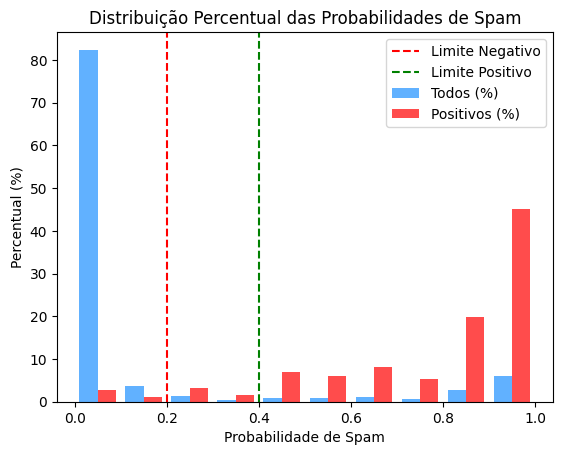

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# step define a largura dos bins do histograma
step = 0.1
bins = np.arange(0, 1 + step, step)

# calcula histogramas de contagem
hist_all, _ = np.histogram(df_pos["prob_spam"], bins=bins)  # todas as mensagens
hist_pos, _ = np.histogram(df_apenas_positivo["prob_spam"], bins=bins)  # apenas spams

# converte contagens para percentual
hist_all_pct = (hist_all / hist_all.sum()) * 100
hist_pos_pct = (hist_pos / hist_pos.sum()) * 100

# define posição das barras
width = step * 0.4
x = bins[:-1] + step/2

# plota histogramas lado a lado
plt.bar(x - width/2, hist_all_pct, width=width, label='Todos (%)', color='#1E90FF', alpha=0.7)
plt.bar(x + width/2, hist_pos_pct, width=width, label='Positivos (%)', color='red', alpha=0.7)

plt.xlabel('Probabilidade de Spam')
plt.ylabel('Percentual (%)')
plt.title('Distribuição Percentual das Probabilidades de Spam')

# adiciona linhas de corte
threshold_neg = 0.2
threshold_pos = 0.4
plt.axvline(threshold_neg, color='red', linestyle='--', label='Limite Negativo')
plt.axvline(threshold_pos, color='green', linestyle='--', label='Limite Positivo')

plt.legend()
plt.show()


In [35]:
#Feito por João Mottin
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Corte 0.2 -> considera como positivo apenas prob > 0.2 (zona negativa como 0)
y_pred_neg = (df_pos["prob_spam"] >= 0.2).astype(int)

# Corte 0.4 -> considera como positivo prob >= 0.4 (zona positiva como 1)
y_pred_pos = (df_pos["prob_spam"] >= 0.4).astype(int)

# métricas para corte 0.2
print("Corte 0.2")
print("Accuracy:", accuracy_score(df_pos["target"], y_pred_neg))
print("Precision:", precision_score(df_pos["target"], y_pred_neg))
print("Recall:", recall_score(df_pos["target"], y_pred_neg))
# print("F1:", f1_score(df_pos["target"], y_pred_neg))

# métricas para corte 0.4
print("\nCorte 0.4")
print("Accuracy:", accuracy_score(df_pos["target"], y_pred_pos))
print("Precision:", precision_score(df_pos["target"], y_pred_pos))
print("Recall:", recall_score(df_pos["target"], y_pred_pos))
# print("F1:", f1_score(df_pos["target"], y_pred_pos))


Corte 0.2
Accuracy: 0.9849246231155779
Precision: 0.927461139896373
Recall: 0.9623655913978495

Corte 0.4
Accuracy: 0.9885139985642498
Precision: 1.0
Recall: 0.9139784946236559


In [34]:
def assign_zone(prob):
    if prob <= 0.2:
        return "negativa"
    elif prob >= 0.4:
        return "positiva"
    else:
        return "manual"

df_pos["zone"] = df_pos["prob_spam"].apply(assign_zone)

# Ver quantos exemplos vão para cada zona
print(df_pos["zone"].value_counts())


zone
negativa    1200
positiva     167
manual        26
Name: count, dtype: int64


In [25]:
y_test

,target
3245,0
944,0
1044,0
2484,0
812,0
...,...
668,0
218,0
5536,0
1657,0


array([[<Axes: title={'center': 'prob_spam'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

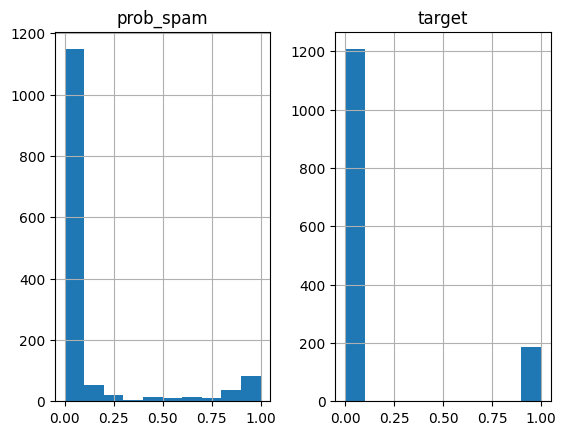

In [26]:
df_pos.hist()

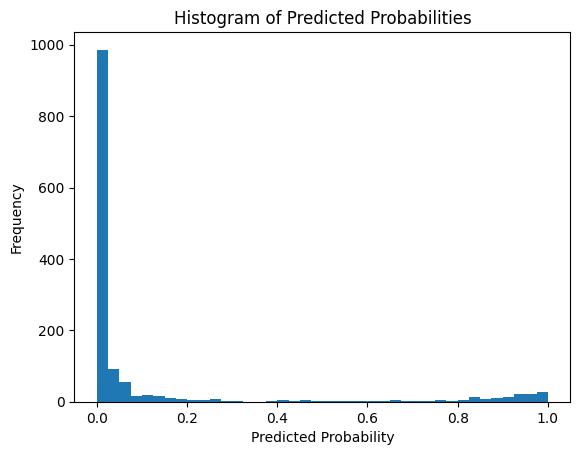

In [36]:
plt.hist(positive_probs, bins=40)
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Probabilities")
plt.show()

In [37]:
nomes_features = vectorizer.get_feature_names_out()

     Feature  Importance
1525    call    0.037664
7257     www    0.027045
6740     txt    0.023435
4317  mobile    0.021810
293     150p    0.018390
1732   claim    0.018102
5157   prize    0.016387
6766      uk    0.016222
2832    free    0.015838
6187    stop    0.014968


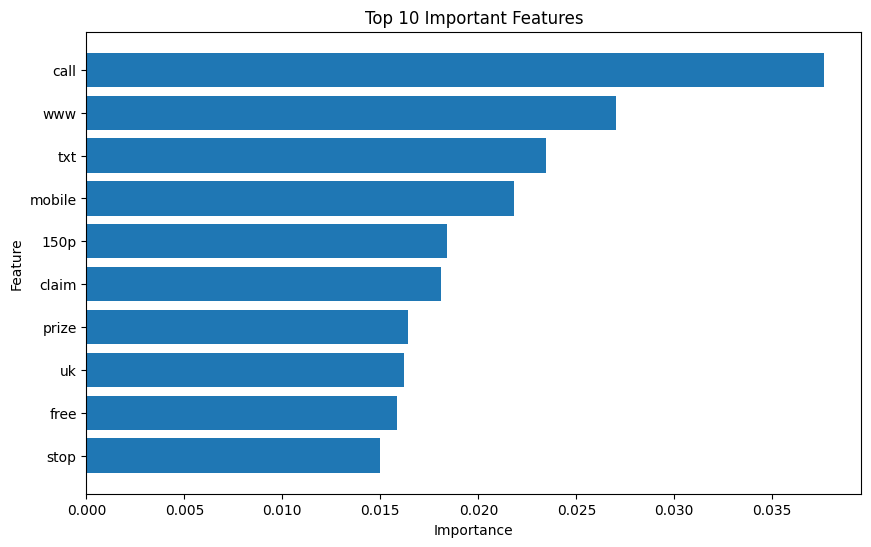

In [38]:
# Get feature importances from the trained Random Forest
importances = model.feature_importances_

# Map feature names to their importance scores
feature_names = vectorizer.get_feature_names_out()
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance (descendente)
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Exibir as N features mais importantes
N = 10
print(feature_importance_df.head(N))

# Plotar visualmente as importâncias
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:N], feature_importance_df['Importance'][:N])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {N} Important Features')
plt.gca().invert_yaxis()  # Inverte eixo y para melhor leitura
plt.show()